In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

TITANIC_PATH = os.path.join("./external/jack-dies", "data")

train_data = pd.read_csv( os.path.join(TITANIC_PATH, "train.csv") )
test_data = pd.read_csv( os.path.join(TITANIC_PATH, "test.csv") )


In [3]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
(num_obs, num_features) = train_data.shape
print("There are {nr} observations and {nf} attributes (including the target)".format(nr=num_obs, nf=num_features))

There are 891 observations and 12 attributes (including the target)


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
def plot_attrs(df, attrs, attr_type="Cat", normalize=True, plot=True):
    num_attrs = len(attrs)
    ncols = 2
    nrows = max(1, round(num_attrs/ncols))
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, num_attrs*2))
    
    if num_attrs == 1:
        axes = np.array( [axes] )
    
    for i, attr in enumerate(attrs):
        if attr_type == "Cat":
            alpha_bar_chart = 0.55
            plot_data = df.loc[:, attr].value_counts(normalize=normalize).sort_index()
            
            args = {"kind":"bar"}
            kind = "bar"
        else:
            plot = df.loc[:, [attr]]
            
            args = {"kind":"hist"}
            if normalize:
                args["density"] = True
            kind = "hist"
            
        if plot:
            _ = plot_data.plot(title=attr, ax=axes.flatten()[i], **args)
        else:
            print(attr + "\n")
            print(plot_data)
            print("\n")
            

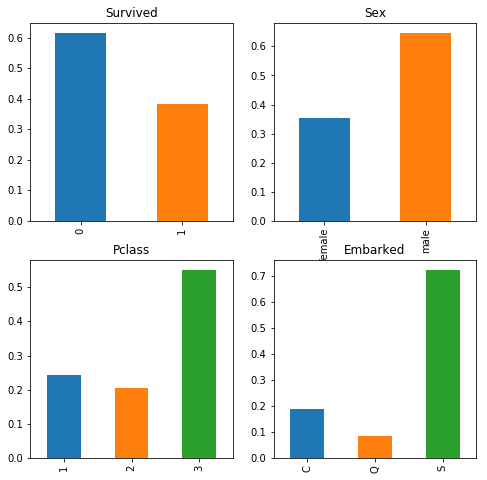

In [25]:
plot_attrs(train_data, ["Survived", "Sex", "Pclass", "Embarked"], attr_type="Cat", plot=True)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

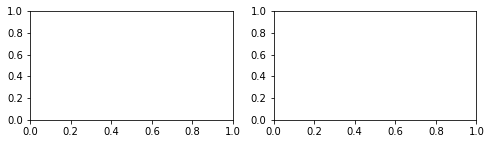

In [30]:
plot_attrs(train_data, [ "Age" ], attr_type="Num")

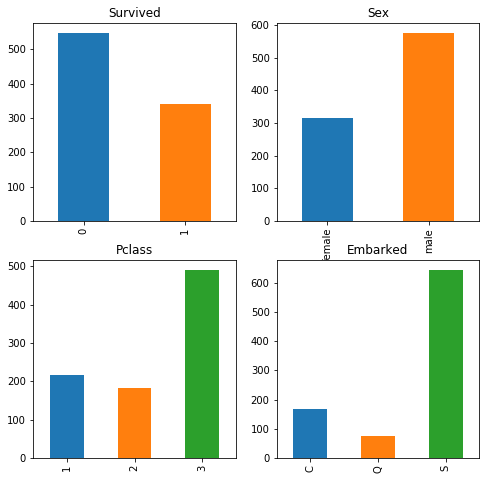

In [31]:
plot_attrs(train_data, [ "Survived", "Sex", "Pclass", "Embarked" ], attr_type="Cat", plot=True, normalize=False)

In [32]:


def plot_cond( df, var, conds, ax, normalize=True):
    """
    Plot probability of a value in column var of DataFrame df, conditional on conditions expressed in conds
    
    Parameters
    ----------
    df: DataFrame
    var: String.  Name of column in df whose density we will plot
    conds: Dictionary
    - keys are Strings, which are names of columns in df
    - values are values that could be compared with column at the key
    
    
    """
    plot_data = df.copy()
    title_array = []
    
    for cond, val in conds.items():
        title_array.append( "{c}={v}".format(c=cond, v=val))
        plot_data = plot_data.loc[ plot_data.loc[:, cond] == val, : ]
        
        args = { "kind": "bar"}
        
    
    plot_data = plot_data.loc[:, var ]
    
    title = ", ".join(title_array)
    title = "Prob({v} | {t})".format(v=var, t=title)
    plot_data.value_counts(normalize=normalize).sort_index().plot(title=title, ax=ax, **args)
    
def plot_conds(df, specs):
    """
    Print multiple conditional plots using plot_cond
    
    Parameters
    -----------
    df: DataFrame
    specs: List. Each element of the list is a tuple (var, conds)
    -  each element of the list generates a call to plot_cond(df, var, conds)
    """
    num_specs = len(specs)
    ncols=3
    nrows = max(1,round(.4999 + num_specs/ncols))
  
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, num_specs*1.5))
    
    # Make sure axes is an array (special case when num_attrs==1)
    if num_specs == 1:
        axes =np.array( [ axes ])
        
    for i, spec in enumerate(specs):
        if spec is None:
            continue
        (var, conds) = spec
        plot_cond(df, var, conds, ax=axes.flatten()[i])

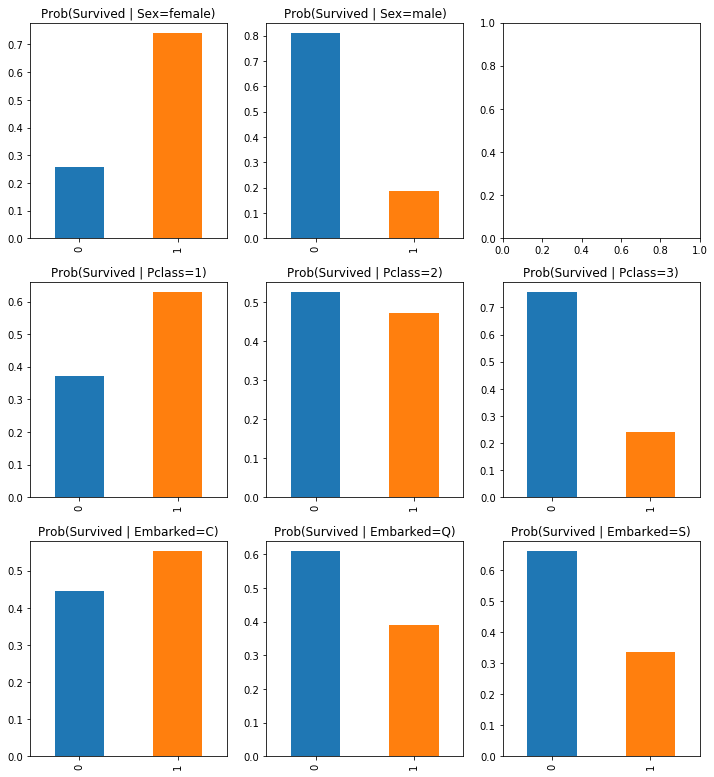

In [33]:
plot_conds(train_data, [ ("Survived", { "Sex": "female"}),
                         ("Survived", { "Sex": "male"}),
                         None,
                         ("Survived", { "Pclass": 1}),
                         ("Survived", { "Pclass": 2}),
                         ("Survived", { "Pclass": 3}),
                        
                         ("Survived", { "Embarked":"C"}),
                         ("Survived", { "Embarked":"Q"}),
                         ("Survived", { "Embarked":"S"}),
                       ]
          )


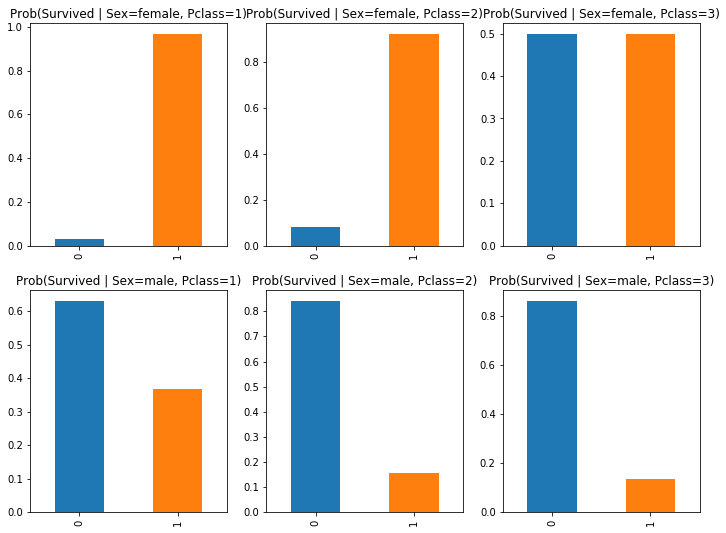

In [34]:
plot_conds(train_data, [
                         ("Survived", { "Sex": "female", "Pclass": 1}),
                         ("Survived", { "Sex": "female", "Pclass": 2}),
                         ("Survived", { "Sex": "female", "Pclass": 3}),
    
                         ("Survived", { "Sex": "male", "Pclass": 1}),
                         ("Survived", { "Sex": "male", "Pclass": 2}),
                         ("Survived", { "Sex": "male", "Pclass": 3}),
                       ])

In [38]:
males = train_data[ train_data["Sex"] == "male" ]
females = train_data[ train_data["Sex"] == "female" ]

count_males, count_females = males.shape[0], females.shape[0]
survival_males, survival_females = males["Survived"].mean(), females["Survived"].mean()

print( "male\t{c}\t{m:0.4f}".format(c=count_males, m=survival_males) )
print( "female\t{c}\t{m:0.4f}".format(c=count_females, m=survival_females) )

male	577	0.1889
female	314	0.7420


In [52]:
train_data.groupby("Sex").agg(["mean", "count"])["Survived"]

,mean,count
Sex,,
female,0.742038,314
male,0.188908,577


In [46]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
